# Análisis exploratorio de datos 
### Contenido
1. [Introducción](#introducción)
2. [Librearías e importación de datos](#librerías-e-importación-de-datos)
3. [Tabla clientes](#tabla-clientes)
4. [Tabla transacciones](#tabla-transacciones)
5. [Variable objetivo](#variable-objetivo)
5. [Resumen](#Resumen)

# Introducción

En este notebook realizamos un análisis exploratorio de los datos brindados para construir el modelo pedictivo de impagos de tarjetas de crédito. 

Para cada campo de las tablas de *clientes* y *transacciones* se analizan características como: 
- El tipo de variable, si es nominal, ordinal, contínua, etc. 
- La consistencia e inconsistencia de los datos.
- Valores faltantes y valores atípicos.
- Para los campos numericos se hallan medidas estadísticas básicas como distribución, rango, media, etc. 
- Para los campos cualitativos se realizan conteos básicos.

Al final, se presenta un resúmen con los hallazgos más significativos.

# Librerías e importación de datos

In [1]:
# Importar librerías y funciones
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones provenientes de otro módulo
from utils import dar_estilo_visual, grafico_distribucion

In [2]:
# Configurar parámetros globales de matplotlib y seaborn 
dar_estilo_visual()

In [66]:
# Cargar datos
transacciones = pd.read_csv("data/historial_transacciones.csv", delimiter="|")
clientes = pd.read_csv("data/informacion_clientes.csv", delimiter="|")
etiquetas = pd.read_csv("data/etiquetas.csv", delimiter="|")

# Tabla clientes

In [4]:
clientes.head()

,CLIENT_ID,Cupo_TC,SEX,EDUCATION,MARRIAGE,AGE
0,29c55f5f-0da7-43ec-ba1b-b60592689825,270000,Femenino,universidad,Casado,28
1,f818136a-138f-4578-a0bb-41605b67e0e5,80000,Femenino,colegio,soltero_a,52
2,bef609a9-f9c5-4870-be7f-cb20e70f7e92,210000,Femenino,universidad,Casado,36
3,2ba3a218-4792-4672-82c7-4b0953101d41,230000,Femenino,colegio,Casado,44
4,723e61b4-d151-4368-b129-468417fd930c,130000,Femenino,Posgrado,Casado,36


In [5]:
print(f"La tabla contiene {clientes.shape[0]} registros y {clientes.shape[1]} columnas")

La tabla contiene 24000 registros y 6 columnas


In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CLIENT_ID  24000 non-null  object
 1   Cupo_TC    24000 non-null  int64 
 2   SEX        24000 non-null  object
 3   EDUCATION  24000 non-null  object
 4   MARRIAGE   24000 non-null  object
 5   AGE        24000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
# Verificar si la columna CLIENT_ID no presenta valores repetidos
clientes["CLIENT_ID"].nunique()

24000

La tabla Clientes presenta información socio demográfica de los clientes en cuestión, posee 24 mil registros y los siguientes campos:
- **CLIENT_ID:** Identificador único para cada cliente.
- **Cupo_TC:** Cupo fijo original de la tarjeta de crédito. 
- **SEX:** Sexo biológico. 
- **EDUCATION:** Nivel educativo 
- **MARRIAGE:** Estado civil
- **AGE:** Edad

Adicionalmente, no se presentan missing values en ningún campo.

### Cupo tarjeta de crédito

In [8]:
# Medidas estadísticas básicas
clientes["Cupo_TC"].describe()

count     24000.000000
mean     167828.736667
std      129957.242751
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: Cupo_TC, dtype: float64

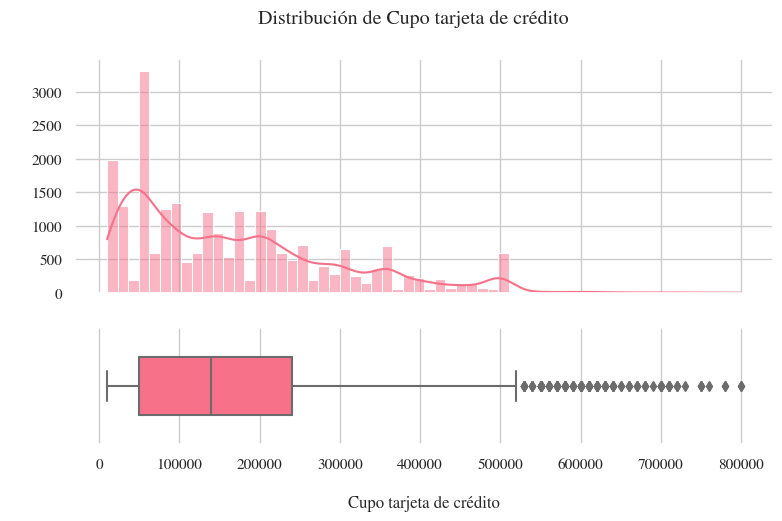

In [9]:
# Graficar un histograma y boxplot para conocer la distribución de la variable
fig, ax = grafico_distribucion(clientes["Cupo_TC"])
plt.xlabel("\nCupo tarjeta de crédito")
fig.suptitle("Distribución de Cupo tarjeta de crédito")
plt.show()

Observamos la variable Cupo_TC es numérica con valores enteros, tiene una distribución de probabilidad sesgada a la izquierda, presenta un rango de $790.000 y no contiene datos inconsistentes.

### Sexo biológico

In [10]:
# Calcular el porcentaje de cada categoría 
sex_summary = clientes.groupby("SEX").count()["CLIENT_ID"]
share = sex_summary / sex_summary.sum()
sex_summary = pd.concat([sex_summary, share], axis=1)
sex_summary.columns = ["Cantidad", "Proporción"]
sex_summary.style.format({"Proporción": '{:,.2%}'.format})

,Cantidad,Proporción
SEX,,
Femenino,14507,60.45%
Masculino,9493,39.55%


El campo SEX es una variable nominal binaria cuyos valores son *Masculino* y *Femenino*. No presenta ningún dato inconsistente. Aproximadamente el 60% de la muestra son mujeres y el 40% son hombres.

### Nivel de escolaridad

In [11]:
# Categorías y número de clientes por categoría
clientes.EDUCATION.value_counts()

EDUCATION
universidad    11151
Posgrado        8493
colegio         3967
5                230
otro             107
6                 41
0                 11
Name: count, dtype: int64

Consideramos que hay datos inconsistentes, ya que los valores $0$, $5$ y $6$ no tienen coherencia con el campo

In [12]:
# Calcular el porcentaje de cada categoría 
ed_summary = clientes.groupby("EDUCATION").count()["CLIENT_ID"]
share = ed_summary / ed_summary.sum()
ed_summary = pd.concat([ed_summary, share], axis=1)
ed_summary.columns = ["Cantidad", "Proporción"]
ed_summary.style.format({"Proporción": '{:,.2%}'.format})

,Cantidad,Proporción
EDUCATION,,
0,11,0.05%
5,230,0.96%
6,41,0.17%
Posgrado,8493,35.39%
colegio,3967,16.53%
otro,107,0.45%
universidad,11151,46.46%


In [13]:
# Calcular porcentaje de datos inonsistentes
num_inconsistentes = len(clientes.query('EDUCATION in ["0","5","6"]'))
prop_inconsistentes = num_inconsistentes / len(clientes)
print('Hay {} datos inconsistentes en la columna EDUCATION lo que representa el {:.2%}'.format(num_inconsistentes, prop_inconsistentes))

Hay 282 datos inconsistentes en la columna EDUCATION lo que representa el 1.18%


Puesto que la cantidad de datos inconsistentes es solo del 1.18% , para el modelo predictivo eliminaremos estos registros.

La variable EDUCATION es una columna categórica nominal cuyas categorías son *colegio*, *universidad*, *posgrado* y *otro*



### Estado civil

In [14]:
# Categorías y número de clientes por categoría
clientes.MARRIAGE.value_counts()

MARRIAGE
soltero_a    12752
Casado       10954
otro           245
0               49
Name: count, dtype: int64

Observamos que hay 49 datos inconsistes en esta columna cuyo valor es $0$. Puesto que se trata de un porcentaje muy bajo de la muestra, prescindiremos de estos registros para la construcción del modelo predictivo.

La columna MARRIAGE representa una variable nominal cuyas categorías son *solotero_a*, *Casado* y *otro*

### Edad

In [15]:
# Medidas estadísticas básicas
clientes.AGE.describe()

count    24000.000000
mean        35.477542
std          9.210014
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

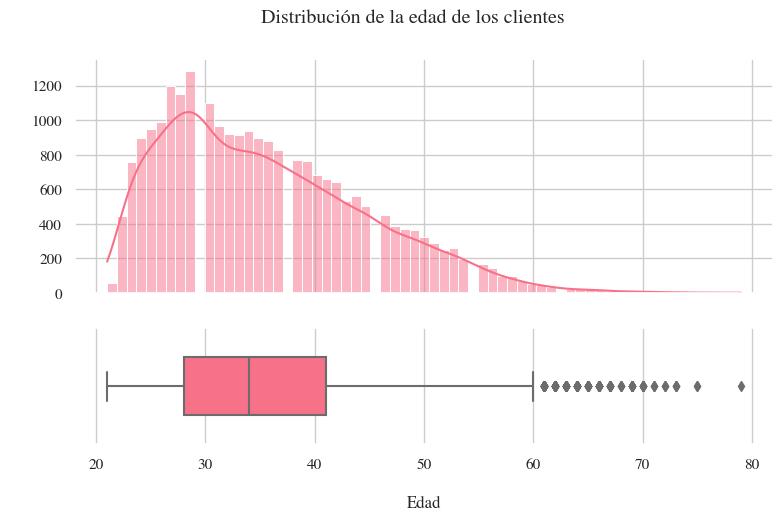

In [16]:
# Graficar un histograma y boxplot para conocer la distribución de la variable
fig, ax = grafico_distribucion(clientes["AGE"])
plt.xlabel("\nEdad")
fig.suptitle("Distribución de la edad de los clientes")
plt.show()

Observamos que la columna AGE representa una variable numérica con valores enteros, cuya distribución es sesgada a la izquierda. Los clientes presentan un rango de edad entre 21 y 79 años, aunque la mayoría de clientes se encuentran entre los 25 y 45 años de edad. La columna no presenta datos inconsistentes.

# Tabla transacciones

In [17]:
transacciones.head()

,MONTH,CLIENT_ID,RETRASO_PAGO_ESTADO,DEUDA_MES,PAGO_MES
0,9,29c55f5f-0da7-43ec-ba1b-b60592689825,0,322249,10000
1,9,f818136a-138f-4578-a0bb-41605b67e0e5,0,42635,1623
2,9,bef609a9-f9c5-4870-be7f-cb20e70f7e92,0,143225,6483
3,9,2ba3a218-4792-4672-82c7-4b0953101d41,-1,54798,11632
4,9,723e61b4-d151-4368-b129-468417fd930c,0,129689,5000


In [19]:
print(f"La tabla contiene {transacciones.shape[0]} registros y {transacciones.shape[1]} columnas")

La tabla contiene 144000 registros y 5 columnas


In [21]:
# Recuento columna MONTH
transacciones.MONTH.value_counts()

MONTH
9    24000
8    24000
7    24000
6    24000
5    24000
4    24000
Name: count, dtype: int64

In [23]:
print(f"Número de IDs únicos: {transacciones.CLIENT_ID.nunique()}")

Número de IDs únicos: 24000


Observamos que la tabla transacciones tiene 144000 registros con observaciones temporales de los campos *RETRASO_PAGO_ESTADO*, *DEUDA_MES* y *PAGO_MES*. 

Tiene información de 24 mil clientes a lo largo de 6 meses, cada mes corresponde a una observación temporal, tomaremos la siguiente convención:

$$
\begin{array}{l | c | c | c | c | c | c}
\text{Mes} & 9 & 8 & 7 & 6 & 5 & 4 \\
\hline
\text{Marca temporal} & t & t-1 & t-2 & t-3 & t-4 & t-5
\end{array}
$$

In [171]:
# Aplicar el mapeo de acuerdo a la convención
convencion = {9-i: f't-{i}' for i in range(6)}
transacciones["MONTH"] = transacciones["MONTH"].map(convencion)

Para analizar adecuadamente la información de las tres variables como series de tiempo asociada a cada cliente, utilizaremos tablas de pivote para cada una variables.

### Estado de retraso de pago

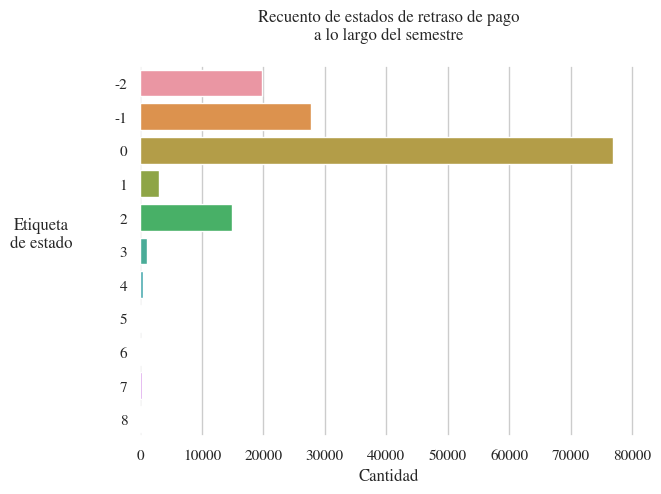

In [61]:
# Recuento de todos los valores únicos 
ax = sns.countplot(data = transacciones, y="RETRASO_PAGO_ESTADO")
plt.title("Recuento de estados de retraso de pago\na lo largo del semestre\n")
plt.ylabel("Etiqueta\nde estado", rotation=0,)
plt.xlabel("Cantidad")
ax.yaxis.set_label_coords(-0.2,0.5)
plt.show()

Observamos que el estado más recurrente es $0$, que indica que no hubo retrasos en los pagos. Adicionalmente, los números del $1$ al $8$ sugieren que hay o hubo un retraso de esa cantidad de meses en el pago. Conjeturamos que las etiquetas $-1$ y $-2$ no son datos inconsistentes ya que existe una alta proporción de estas etiquetas, probablemente indiquen un pago adelantado.

In [69]:
# Transponer meses para la analizar variable RETRASO_PAGO_ESTADO como serie de tiempo para cada cliene
retraso = transacciones.pivot(index="CLIENT_ID", columns="MONTH", values="RETRASO_PAGO_ESTADO")
retraso.head()

MONTH,t-0,t-1,t-2,t-3,t-4,t-5
CLIENT_ID,,,,,,
00004d47-2e99-461f-b6bf-59802fc72a8c,0,0,0,0,0,0
000af878-0c8d-4d31-901a-d4b5c584e08f,0,0,0,0,0,0
000c3e2f-013e-4894-81aa-aa96357a1cf2,0,0,-1,-1,-1,-1
000e7e42-2d80-441c-9ed5-df0e9dbb4c02,-1,-1,-1,-1,-1,-1
0011d46a-bf48-482d-aab0-526fe8b6e254,1,-2,-2,-2,-2,-2


El campo RETRASO_PAGO_ESTADO es una variable numérica ordinal con valores enteros que induce una serie temporal para cada cliente. No presenta datos inconsistentes.

### Deudas mensuales

La variable DEUDA_MES corresponde al monto total de la deuda en la tarjeta de crédito del cliente en un determinado mes.

In [73]:
# Medidas estadísticas básicas
transacciones["DEUDA_MES"].describe()

count    1.440000e+05
mean     4.466619e+04
std      6.630685e+04
min     -3.396030e+05
25%      2.301750e+03
50%      1.919100e+04
75%      5.704425e+04
max      1.664089e+06
Name: DEUDA_MES, dtype: float64

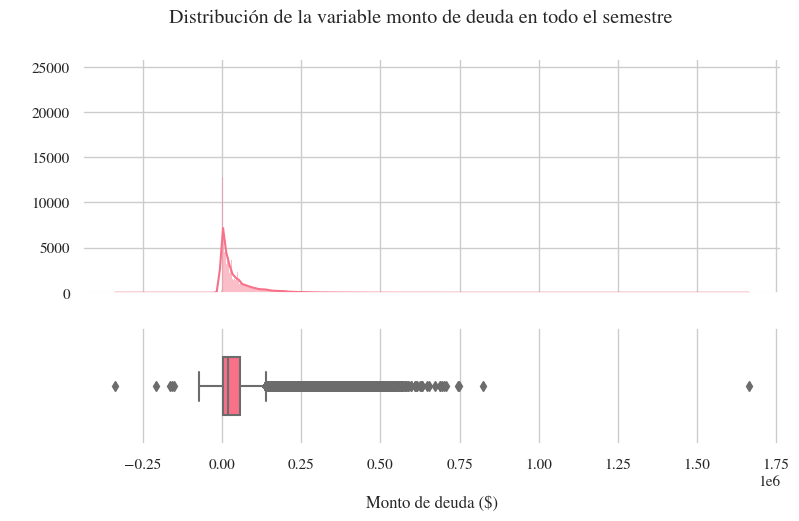

In [74]:
# Graficar un histograma y boxplot para conocer la distribución de la variable
fig, ax = grafico_distribucion(transacciones["DEUDA_MES"])
plt.xlabel("\nMonto de deuda ($)")
fig.suptitle("Distribución de la variable monto de deuda en todo el semestre")
plt.show()

Observamos que la variable DEUDA_MES presenta valores enteros, sin embargo,
- Existen valores **negativos**, puede que sean datos inconsistentes o que representen algún otro hecho relacionado con la deuda. 
- Observamos la presencia de **outliers** estadísticos de acuerdo a la **regla intercuartil**.
- Observamos también la presencia de datos **inconsistentes**, pues el monto de deuda no puede ser mayor al cupo de la tarjeta, reordemos que el cupo mayor era de $\$800.000$

In [77]:
num_deudas_neg = len(transacciones.query('DEUDA_MES<0'))
print(f"Existen {num_deudas_neg} transacciones con deudas negativas")

Existen 3163 transacciones con deudas negativas


Ahora observemos las deudas a nivel de cliente. Para ello transponemos los meses en columnas.

In [103]:
deudas = pd.pivot(transacciones, index="CLIENT_ID", columns="MONTH", values="DEUDA_MES")
deudas

MONTH,t-0,t-1,t-2,t-3,t-4,t-5
CLIENT_ID,,,,,,
00004d47-2e99-461f-b6bf-59802fc72a8c,81787,77845,60159,54151,45108,44490
000af878-0c8d-4d31-901a-d4b5c584e08f,21023,27270,11342,8305,7288,0
000c3e2f-013e-4894-81aa-aa96357a1cf2,19805,19900,390,390,0,780
000e7e42-2d80-441c-9ed5-df0e9dbb4c02,25487,6655,6355,18543,6022,1334
0011d46a-bf48-482d-aab0-526fe8b6e254,0,0,0,0,0,0
...,...,...,...,...,...,...
ffeeee1b-ad11-4bca-b461-2955c872a158,47937,33816,60320,36249,780,0
fff43052-7f1f-473f-8a56-99fff7ed0018,22778,6405,1683,-885,3019,-177
fff71109-4aae-49d5-9233-3efd3c7f45b1,268537,207118,202412,207496,250337,255277


In [104]:
# Clientes con deudas negativas
deudas[deudas<0].dropna(how='all')

MONTH,t-0,t-1,t-2,t-3,t-4,t-5
CLIENT_ID,,,,,,
0025e4aa-2ad1-49a2-8ee5-fb6e65791502,NaN,NaN,NaN,-101.0,NaN,NaN
004580bc-a753-4d62-8134-6dfa72b133e9,NaN,-2000.0,NaN,NaN,NaN,NaN
004e5527-dd4a-48ef-add0-8fc797c4eef6,-89.0,NaN,NaN,NaN,NaN,NaN
009aae1c-e7fc-4ac8-8cc5-215a35d7ebdf,NaN,NaN,-27.0,NaN,NaN,NaN
00c22be3-34dc-47cc-8fef-180da277f0f7,NaN,-1.0,-1.0,-1.0,-1.0,NaN
...,...,...,...,...,...,...
ff4b718f-cd71-4e0b-ae52-faf5b36c4338,NaN,NaN,-721.0,-710.0,NaN,NaN
ff9871c0-0587-46fe-a95e-567d9db6c86d,NaN,-627.0,NaN,NaN,NaN,NaN
ffb0196a-d064-4632-a8c0-0798c17d6933,NaN,NaN,-29.0,-29.0,-29.0,-29.0


In [105]:
num_clientes_deudas_neg = len(deudas[deudas<0].dropna(how='all'))
prop_deudas_neg = num_clientes_deudas_neg/len(clientes)
print("Hay {} clientes con deudas negativas, lo que representa el {:.2%}".format(num_clientes_deudas_neg, prop_deudas_neg))


Hay 1524 clientes con deudas negativas, lo que representa el 6.35%


Observamos que existen 1524 clientes que tienen por lo menos un monto de deuda negativo en algún mes, lo que representa un 6.35% de la muestra de todos los clientes. Para corregir este problema se podrían eliminar estos registros o reemplazarlos usando alguna técnica de imputación de datos.

**¿Imputación de datos?**

Una aproximación a la imputación de datos para esta variable consiste en reemplazar los valores negativos con la media de deuda a lo largo del semestre o reemplazar el dato negativo realizando una interpolación con base en los datos positivos. Sin embargo, para realizarlo, tendríamos que asegurarnos de que la mayoría de datos de deudas del cliente fuesen consistentes.

In [106]:
# Clientes con todas sus deudas negativas
deudas[deudas<0].dropna(how='any')

MONTH,t-0,t-1,t-2,t-3,t-4,t-5
CLIENT_ID,,,,,,
01b4f798-0901-44cf-9c63-63e087da56d1,-1590.0,-6256.0,-10922.0,-15588.0,-20254.0,-24920.0
07d20a27-570c-4ee9-94df-5ce595bc8259,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0
0a53f40f-ed7a-4297-9b30-d07d3fad3d93,-212.0,-212.0,-212.0,-212.0,-212.0,-212.0
11746ec8-1a75-4250-8d9f-07eccb5998eb,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
11cc56fe-19da-4042-9c6a-6bf4baaf7162,-12.0,-12.0,-12.0,-12.0,-12.0,-12.0
...,...,...,...,...,...,...
ec0a1e13-85c0-4f7c-b8e4-ee0b559a4115,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
f15aa97e-4d5e-4cb2-8537-3b641b7ce6b6,-702.0,-808.0,-1141.0,-1247.0,-1353.0,-1459.0
f46c196b-a311-4f1e-a565-caf6d6065cd5,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0


Observamos que existen 74 clientes con todas sus deudas negativas, en donde no tiene sentido realizar la imputación, por lo tanto, eliminaremos dichos registros para la construcción del modelo.

### Pagos mensuales

In [107]:
# Medidas estadísticas básicas
transacciones["PAGO_MES"].describe()

count    1.440000e+05
mean     5.225306e+03
std      1.712472e+04
min      0.000000e+00
25%      3.900000e+02
50%      1.874000e+03
75%      4.516000e+03
max      1.684259e+06
Name: PAGO_MES, dtype: float64

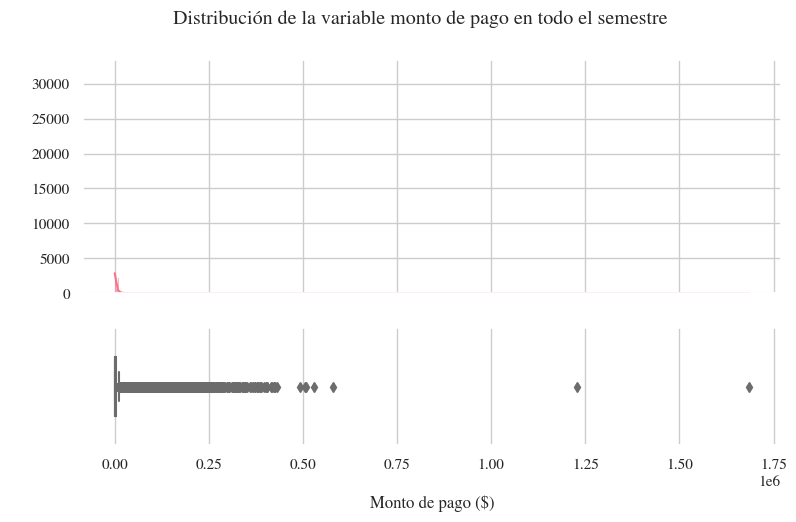

In [108]:
# Graficar un histograma y boxplot para conocer la distribución de la variable
fig, ax = grafico_distribucion(transacciones["PAGO_MES"])
plt.xlabel("\nMonto de pago ($)")
fig.suptitle("Distribución de la variable monto de pago en todo el semestre")
plt.show()


Obsermos la presencia de datos **inconsistentes** correspondientes a pagos mayores al cupo de la tarjeta, lo que no nos permite entender claramente los gráficos de dsitribución.

In [110]:
# Tabla pivote de pagos
pagos = pd.pivot(transacciones, index="CLIENT_ID", columns="MONTH", values="PAGO_MES")
pagos

MONTH,t-0,t-1,t-2,t-3,t-4,t-5
CLIENT_ID,,,,,,
00004d47-2e99-461f-b6bf-59802fc72a8c,2600,3009,2200,2000,2000,2832
000af878-0c8d-4d31-901a-d4b5c584e08f,3000,1000,0,0,0,0
000c3e2f-013e-4894-81aa-aa96357a1cf2,1000,390,390,0,780,0
000e7e42-2d80-441c-9ed5-df0e9dbb4c02,6655,6359,18543,6022,1334,3864
0011d46a-bf48-482d-aab0-526fe8b6e254,0,0,0,0,0,0
...,...,...,...,...,...,...
ffeeee1b-ad11-4bca-b461-2955c872a158,2000,2000,3293,0,0,0
fff43052-7f1f-473f-8a56-99fff7ed0018,6500,2515,0,8000,0,1000
fff71109-4aae-49d5-9233-3efd3c7f45b1,10000,8000,12000,50000,28000,60000


### Registros monetarios inconsistentes

Existen registros de pagos y deudas en la base de datos de transacciones que superan el monto del cupo de la tarjeta de crédito de cada cliente, por lo que se consideran como datos inconsistentes. A continuación realizaremos un análisis de la cantidad de clientes que presentan este comportamiento.

Para ello construimos una tabla con la información monetaria, es decir, pagos, deudas y cupo.

In [157]:
# Transponer deudas y pagos de la tabla transacciones
money_df = pd.pivot(transacciones, index="CLIENT_ID", columns="MONTH", values=["DEUDA_MES", "PAGO_MES"])
# Eliminar el multíndice generado por la transposición
money_df.columns = money_df.columns.to_flat_index()
money_df.columns = [ f"{var}_{time_tag}" for (var, time_tag) in money_df.columns ]
money_df = money_df.reset_index()
# Traer el cupo de la tabla Clientes
money_df = clientes[["CLIENT_ID","Cupo_TC"]].merge(money_df, on="CLIENT_ID")
# Eliminar el ID
money_df = money_df.drop(columns=["CLIENT_ID"])
money_df.head()

,Cupo_TC,DEUDA_MES_t-0,DEUDA_MES_t-1,DEUDA_MES_t-2,DEUDA_MES_t-3,DEUDA_MES_t-4,DEUDA_MES_t-5,PAGO_MES_t-0,PAGO_MES_t-1,PAGO_MES_t-2,PAGO_MES_t-3,PAGO_MES_t-4,PAGO_MES_t-5
0,270000,322249,298700,308133,263516,94062,92618,10000,13000,12000,5000,4000,5000
1,80000,42635,39508,36060,30470,18306,7432,1623,1740,1200,366,7432,0
2,210000,143225,142996,144415,148190,147993,131629,6483,5082,6000,5900,4544,4700
3,230000,54798,11632,4987,6222,15121,17425,11632,4987,6222,15121,17425,17007
4,130000,129689,107070,103942,94623,90556,92394,5000,4400,5000,4000,3500,4000


In [169]:
# Hallar los registros en los que por lo mens un pago o una deuda supera al cupo
condition = money_df.iloc[:, 1:].gt(money_df['Cupo_TC'], axis=0).any(axis=1)
money_incosistente = money_df[condition]
money_incosistente.head()

,Cupo_TC,DEUDA_MES_t-0,DEUDA_MES_t-1,DEUDA_MES_t-2,DEUDA_MES_t-3,DEUDA_MES_t-4,DEUDA_MES_t-5,PAGO_MES_t-0,PAGO_MES_t-1,PAGO_MES_t-2,PAGO_MES_t-3,PAGO_MES_t-4,PAGO_MES_t-5
0,270000,322249,298700,308133,263516,94062,92618,10000,13000,12000,5000,4000,5000
7,20000,19149,20221,19812,10717,13534,15298,1392,1201,1000,3000,2000,399
19,50000,44470,51192,48506,18524,19239,19283,7800,173,1000,1000,1000,1000
37,60000,60745,61085,56863,18473,15434,7301,2613,5900,1000,428,1000,2000
43,20000,20571,19089,19658,19453,19108,18868,1323,1600,830,700,674,376


In [175]:
print(f"Hay {len(money_incosistente)} clientes con registros monetarios inconsistentes")

Hay 3201 clientes con registros monetarios inconsistentes


# Variable objetivo

La variable objetivo proviene de la tabla de etiquetas. Cada cliente se encuentra etiquetado con $0$ o $1$, donde $0$ significa que el pago el próximo mes será puntual y $1$ quiere decir que el cliente no va a pagar su deuda de la tarjeta de crédito el próximo mes.

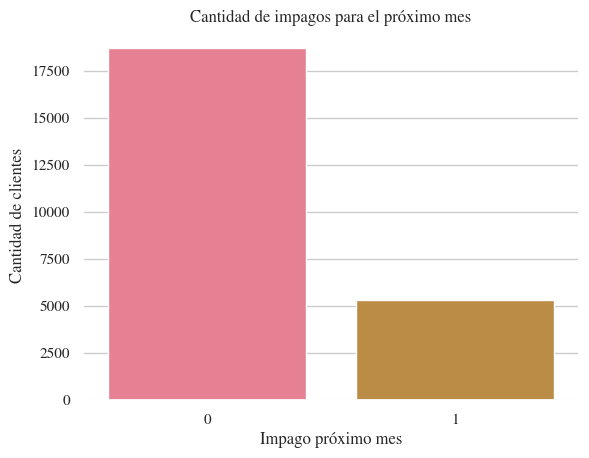

In [178]:
# Proporción 
sns.countplot(etiquetas, x="default payment next month")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Impago próximo mes")
plt.title("Cantidad de impagos para el próximo mes")
plt.show()

In [180]:
next_pay_summary = etiquetas.groupby("default payment next month").count()
next_pay_summary = next_pay_summary.rename(columns={"CLIENT_ID":"cantidad"})
next_pay_summary["proporcion"] = next_pay_summary["cantidad"] /   next_pay_summary["cantidad"].sum()
next_pay_summary

,cantidad,proporcion
default payment next month,,
0,18715,0.779792
1,5285,0.220208


Se presenta un desbalance de clase, ya que el 78% de los deudores pagarán cumplido el siguiente mes y el 22% presentarán mora. Este desequilibrio de clases representa una gran dificultad a la hora construir el modelo predictivo, por tal razón, se deben usar técnicas para manejarlo.

# Resumen

| **Campo**                            | **Descripción**                                                                                                                                | **Comentario**                                                                           |
|--------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| CLIENT_ID                            | Identificador único para cada cliente.                                                                                |    Se usa para unir tablas                                                                                      |
| Cupo_TC (int)                        | Cupo inicial de la tarjeta de crédito.                                                                                                         | No presenta datos inconsistentes                                                         |
| SEX (nominal)                        | Sexo biológico del cliente.  <br>Categorías: Masculino , Femenino                                                                                  | No presenta datos inconsistentes                                                         |
| EDUCATION (nominal)                  | Nivel de escolaridad del cliente <br>Categorías: colegio, universidad, posgrado, otro                                                              | Valores inconsistentes "0","5","6"                                                       |
| MARRIAGE (nominal)                   | Estado civil del cliente <br>Categorías: soltero_a, casado, otro                                                                                   | Valores inconsistentes  "0"                                                              |
| AGE (int)                            | Edad del cliente                                                                                                                               | No presenta valores inconsistentes                                                       |
| RETRASO_PAGO_ESTADO (int)            | Variable numérica ordinal <br>Serie de tiempo mensual de 6 observaciones para cada cliente <br>Valores: -2, -1 , 0, 1, 2, 3, 4, 5, 6, 7, 8             | No presenta valores inconsistentes                                                       |
| PAGO_MES (int)                       | Variable entera, representa el monto pagado en un mes determinado <br>Serie de tiempo mensual de 6 observaciones para cada cliente                 | Pagos inconsistentes que  superan el valor del cupo                                      |
| DEUDA_MES (int)                      | Variable entera, representa el monto que un cliente  adeuda en un mes determinado <br> Serie de tiempo mensual de 6 observaciones para cada cliente | - Montos inconsistentes que  superan el valor del cupo <br>- Montos negativos inconsistentes |
| default payment next month (binaria) | Variable objetivo binaria, 1 para impago.                                                                                                      | Existe un gran desbalance de clase                                                       |

- Se eliminarán todos los registros que contengan por lo menos un valor inconsistente en alguna columna. Se descarta la imputación de datos en lugar de valores inconsistentes ya que estos registros representan un pequeño porcentaje de la muestra.
- Existe un importante desbalance de clase importante en la variable objetivo, para ellos se propone usar tres técnicas distintas: Validación cruzada estratificada, imputación de datos (oversampling) y eliminación de datos (undersampling).